<center><h1><font color='red'> Guide 1 |  Images + Videos </font></h1></center>



## Objective


## Table of Content:
0. content 1
1. content 2

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 0. Content 1

In [66]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skvideo.io
from tqdm import tqdm

In [67]:
video_path = "data/green_dot.MOV"
video = skvideo.io.vread(video_path)  
print(video.shape)

(576, 1080, 1920, 3)


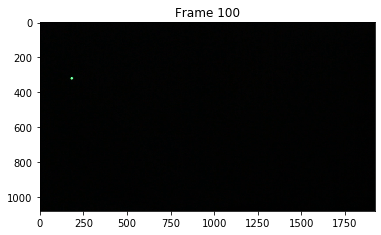

In [14]:
# Test Image
image = video[100,:,:,:]
plt.imshow(image)
plt.title("Frame 100")
plt.show()

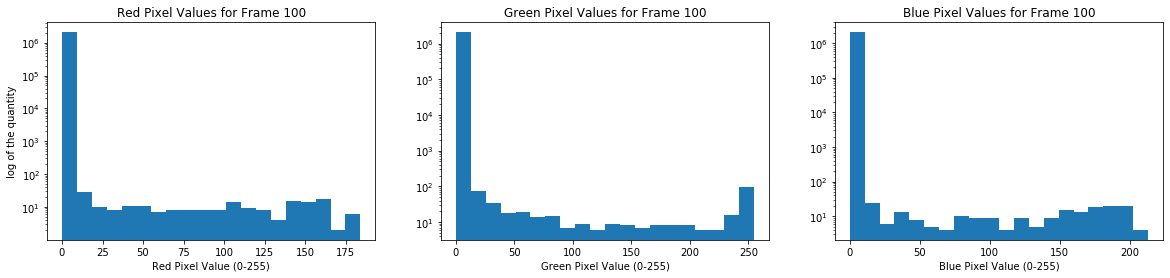

In [34]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

ax[0].hist(image[:,:,0].flatten(), bins=20, log=True)
ax[0].set_xlabel("Red Pixel Value (0-255)"); ax[0].set_ylabel("log of the quantity"); 
ax[0].set_title("Red Pixel Values for Frame 100")

ax[1].hist(image[:,:,1].flatten(), bins=20, log=True)
ax[1].set_xlabel("Green Pixel Value (0-255)"); ax[0].set_ylabel("log of the quantity"); 
ax[1].set_title("Green Pixel Values for Frame 100")

ax[2].hist(image[:,:,2].flatten(), bins=20, log=True)
ax[2].set_xlabel("Blue Pixel Value (0-255)"); ax[0].set_ylabel("log of the quantity"); 
ax[2].set_title("Blue Pixel Values for Frame 100")
plt.show()

In [90]:
green_img = image[:,:,1]
flatten_idx = np.argmax(green_img)
green_idx = np.unravel_index(flatten_idx, green_img.shape)

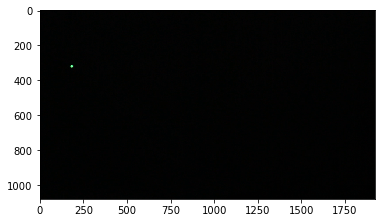

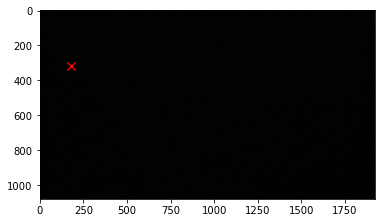

In [96]:
# original image
plt.imshow(image)
plt.show()

# predicted coordinate of green dot
plt.imshow(image)
plt.scatter(green_idx[1], green_idx[0], c='r', marker="x", alpha=0.9, s=70)
plt.show()

In [68]:
num_fr, height, width, num_channel = video.shape
coord = []
for fr in tqdm(range(num_fr)):
    flatten_idx = np.argmax(video[fr,:,:,1])
    green_idx = np.unravel_index(flatten_idx, green_img.shape)
    coord.append(green_idx)
coord = np.stack(coord)

100%|██████████| 576/576 [00:09<00:00, 60.04it/s]


In [69]:
coord.shape

(576, 2)

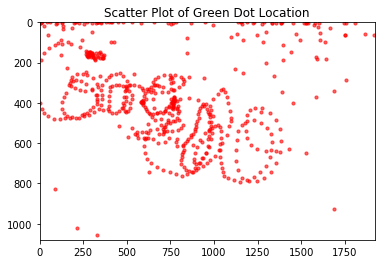

In [113]:
plt.scatter(coord[:,1], coord[:,0], c='r', alpha=0.6, s=10)
plt.xlim([0,width]); plt.ylim([height,0])
plt.title("Scatter Plot of Green Dot Location")
plt.show()

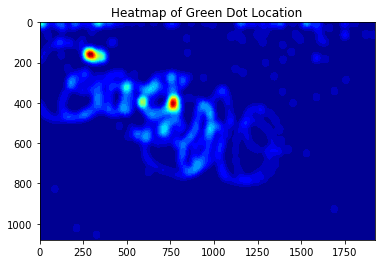

In [112]:
import seaborn as sns

sns.kdeplot(coord[:,1], coord[:,0], n_levels=30, gridsize=150, bw=18, cmap='jet', shade=True)
plt.xlim([0,width]); plt.ylim([height,0])
plt.title("Heatmap of Green Dot Location")
plt.show()

## 1. Velocity

In [123]:
velocity = abs(np.diff(coord).flatten()) # unit: pixel/frame
print(velocity.shape)

(576,)


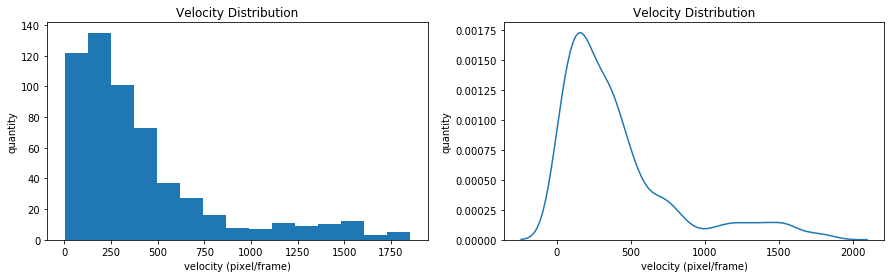

In [124]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].hist(velocity, bins=15)
ax[0].set_xlabel("velocity (pixel/frame)"); ax[0].set_ylabel("quantity"); ax[0].set_title("Velocity Distribution")

sns.kdeplot(velocity, ax=ax[1])
ax[1].set_xlabel("velocity (pixel/frame)"); ax[1].set_ylabel("quantity"); ax[1].set_title("Velocity Distribution")
plt.show()

<hr>
<strong>Created: </strong> August 19, 2020

<strong>Author: </strong> Dong Hur
<center><h1>Reference</h1></center>


* Dataset from Professor Venkatesh Murthy's Lab (Harvard University Department of Mollecular and Cellular Biology)